# Sold! How do home features add up to its price tag?

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
houses = pd.read_csv('train.csv')

In [103]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data visualization

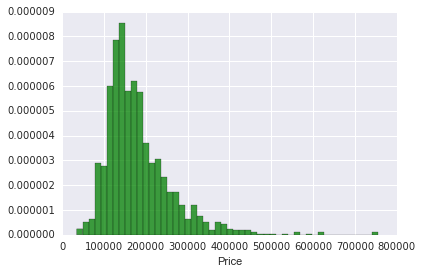

In [104]:
plt.hist(houses['SalePrice'], 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Price')
plt.show()

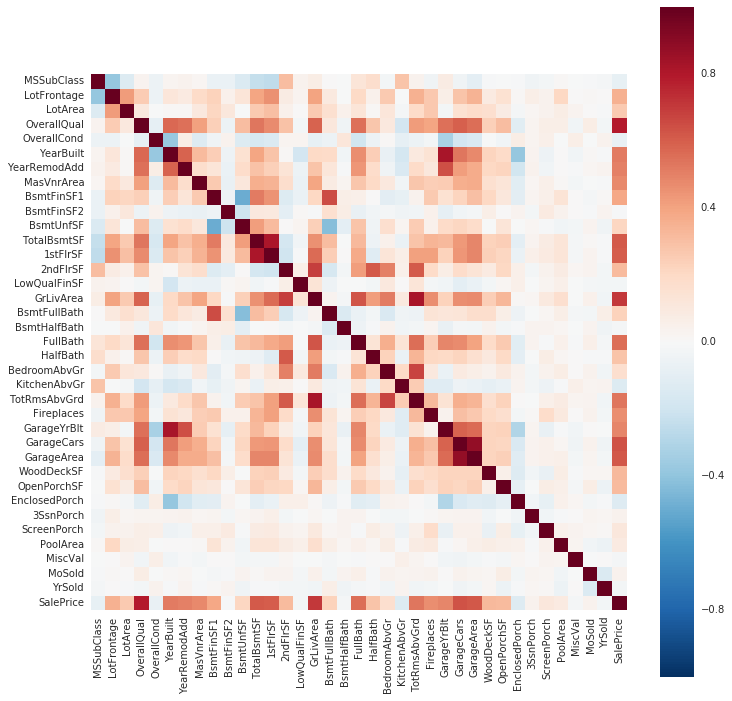

In [105]:
corr = houses.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [109]:
corr_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
for elem in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("Feature {0}: \t{1}".format(*elem))

Feature OverallQual: 	0.7909816005838047
Feature GrLivArea: 	0.7086244776126511
Feature GarageCars: 	0.640409197258349
Feature GarageArea: 	0.6234314389183598
Feature TotalBsmtSF: 	0.6135805515591944
Feature 1stFlrSF: 	0.6058521846919166
Feature FullBath: 	0.5606637627484452
Feature TotRmsAbvGrd: 	0.5337231555820238
Feature YearBuilt: 	0.5228973328794967
Feature YearRemodAdd: 	0.5071009671113867
Feature GarageYrBlt: 	0.48636167748786213
Feature MasVnrArea: 	0.4774930470957107
Feature Fireplaces: 	0.4669288367515242
Feature BsmtFinSF1: 	0.38641980624215627
Feature LotFrontage: 	0.35179909657067854
Feature WoodDeckSF: 	0.32441344456813076
Feature 2ndFlrSF: 	0.31933380283206614
Feature OpenPorchSF: 	0.31585622711605577
Feature HalfBath: 	0.2841076755947784
Feature LotArea: 	0.2638433538714063
Feature BsmtFullBath: 	0.22712223313149718
Feature BsmtUnfSF: 	0.214479105546969
Feature BedroomAbvGr: 	0.1682131543007415
Feature KitchenAbvGr: 	-0.1359073708421417
Feature EnclosedPorch: 	-0.128577

The housing price correlates strongly with OverallQual, GrLivArea, GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces.

### Data preprocessing

In [82]:
houses.describe(include = 'all').ix[:,0:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN


In [83]:
houses.describe(include = 'all').ix[:,10:20]

,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt
count,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000
unique,5,3,25,9,8,5,8,NaN,NaN,NaN
top,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN
freq,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1954.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1973.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2000.000000


In [84]:
houses.describe(include = 'all').ix[:,20:30]

,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation
count,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460
unique,NaN,6,8,15,16,4,NaN,4,5,6
top,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc
freq,NaN,1141,1434,515,504,864,NaN,906,1282,647
mean,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN
std,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN
min,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,1967.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,2004.000000,NaN,NaN,NaN,NaN,NaN,166.000000,NaN,NaN,NaN


In [85]:
houses.describe(include = 'all').ix[:,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
count,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460
unique,4,4,4,6,NaN,6,NaN,NaN,NaN,6
top,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA
freq,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428
mean,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN
std,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,223.000000,795.750000,NaN
50%,NaN,NaN,NaN,NaN,383.500000,NaN,0.000000,477.500000,991.500000,NaN
75%,NaN,NaN,NaN,NaN,712.250000,NaN,0.000000,808.000000,1298.250000,NaN


In [86]:
houses.describe(include = 'all').ix[:,40:50]

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
count,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
unique,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068
std,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916
min,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,NaN,NaN,NaN,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000


In [87]:
houses.describe(include = 'all').ix[:,50:60]

,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
count,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000
unique,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN
top,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN
freq,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN
mean,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164
std,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725
min,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000
25%,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,NaN,NaN,1961.000000
50%,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,NaN,NaN,1980.000000
75%,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,NaN,NaN,2002.000000


In [88]:
houses.describe(include = 'all').ix[:,60:70]

,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
count,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000
unique,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN
top,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN
freq,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN
mean,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589
std,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331
min,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,334.500000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,2.000000,480.000000,NaN,NaN,NaN,0.000000,25.000000,0.000000,0.000000
75%,NaN,2.000000,576.000000,NaN,NaN,NaN,168.000000,68.000000,0.000000,0.000000


In [89]:
houses.describe(include = 'all').ix[:,70:80]

,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460
unique,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6
top,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198
mean,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN
std,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,0.000000,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN
50%,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [90]:
houses['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [91]:
houses['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'], dtype=object)

In [92]:
houses['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [93]:
# fix N/A for numerical features
houses['LotFrontage'] = houses['LotFrontage'].fillna(houses['LotFrontage'].median())
houses['MasVnrArea'] = houses['MasVnrArea'].fillna(0)
houses['GarageYrBlt'] = houses['GarageYrBlt'].fillna(2002)
houses['BsmtFinSF1'] = houses['BsmtFinSF1'].fillna(houses['BsmtFinSF1'].median())

In [94]:
# fix N/A for categorial features
houses['Alley'] = houses['Alley'].fillna('NO')
houses['MasVnrType'] = houses['MasVnrType'].fillna('None')
houses['BsmtQual'] = houses['BsmtQual'].fillna('TA')
houses['BsmtCond'] = houses['BsmtCond'].fillna('TA')
houses['BsmtExposure'] = houses['BsmtExposure'].fillna('No')
houses['BsmtFinType1'] = houses['BsmtFinType1'].fillna('Unf')
houses['BsmtFinType2'] = houses['BsmtFinType2'].fillna('Unf')
houses['Electrical'] = houses['Electrical'].fillna('SBrkr')
houses['FireplaceQu'] = houses['FireplaceQu'].fillna('No')
houses['GarageType'] = houses['GarageType'].fillna('No')
houses['GarageFinish'] = houses['GarageFinish'].fillna('No')
houses['GarageQual'] = houses['GarageQual'].fillna('No')
houses['GarageCond'] = houses['GarageCond'].fillna('No')
houses['PoolQC'] = houses['PoolQC'].fillna('No')
houses['Fence'] = houses['Fence'].fillna('No')
houses['MiscFeature'] = houses['MiscFeature'].fillna(0)
houses.loc[houses["MiscFeature"].isin(['Shed', 'Gar2', 'Othr', 'TenC']), "MiscFeature"] = 1


Encode labels with value between 0 and n_classes-1.

In [95]:
categories = houses.describe(exclude = [np.number])
le = LabelEncoder()
houses[categories.columns] = houses[categories.columns].apply(lambda x: le.fit_transform(x))

In [96]:
X = houses[houses.columns[:-1]]
Y = houses[houses.columns[-1]]

In [97]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,0,3,4,0,0,2,2008,8,4
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,0,3,4,0,0,5,2007,8,4
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,0,3,4,0,0,9,2008,8,4
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,0,3,4,0,0,2,2006,8,0
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,0,3,4,0,0,12,2008,8,4
5,6,50,3,85.0,14115,1,1,0,3,0,...,0,0,3,2,1,700,10,2009,8,4
6,7,20,3,75.0,10084,1,1,3,3,0,...,0,0,3,4,0,0,8,2007,8,4
7,8,60,3,69.0,10382,1,1,0,3,0,...,0,0,3,4,1,350,11,2009,8,4
8,9,50,4,51.0,6120,1,1,3,3,0,...,0,0,3,4,0,0,4,2008,8,0
9,10,190,3,50.0,7420,1,1,3,3,0,...,0,0,3,4,0,0,1,2008,8,4
